In [1]:
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np

from analyzer.plotting import PlotObject, drawAs1DHist

In [2]:
import matplotlib.pyplot as plt

In [3]:
SIGNAL_NAMES = ["signal_312_1000_100", "signal_312_1200_1100", "signal_312_1300_400", "signal_312_1500_1100",
                "signal_312_1500_600", "signal_312_2000_1600", "signal_312_1000_400", "signal_312_1200_400",
                "signal_312_1300_600", "signal_312_1500_1200", "signal_312_1500_900", "signal_312_2000_1700",
                "signal_312_1000_600", "signal_312_1200_600", "signal_312_1400_1300", "signal_312_1500_1300",
                "signal_312_2000_100", "signal_312_2000_1900", "signal_312_1000_700", "signal_312_1200_700",
                "signal_312_1400_400", "signal_312_1500_1350", "signal_312_2000_1200", "signal_312_2000_400",
                "signal_312_1000_800", "signal_312_1200_800", "signal_312_1400_600", "signal_312_1500_1400",
                "signal_312_2000_1300", "signal_312_2000_600", "signal_312_1000_900", "signal_312_1200_900",
                "signal_312_1500_1000", "signal_312_1500_1450", "signal_312_2000_1400", "signal_312_2000_900",
                "signal_312_1200_1000", "signal_312_1300_1200", "signal_312_1500_100", "signal_312_1500_400",
                "signal_312_2000_1500"]

In [4]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

In [5]:
a = AnalysisResult.fromFile("outputs.pkl")
a_background = AnalysisResult.fromFile("backgroundoutput.pkl")
# hists = a.getMergedHistograms(s)
bg_hists = a_background.getMergedHistograms(s)

In [6]:
a.results.keys()

dict_keys(['signal_312_1000_100', 'signal_312_1200_1100', 'signal_312_1300_400', 'signal_312_1500_1100', 'signal_312_1500_600', 'signal_312_2000_1600', 'signal_312_1000_400', 'signal_312_1200_400', 'signal_312_1300_600', 'signal_312_1500_1200', 'signal_312_1500_900', 'signal_312_2000_1700', 'signal_312_1000_600', 'signal_312_1200_600', 'signal_312_1400_1300', 'signal_312_1500_1300', 'signal_312_2000_100', 'signal_312_2000_1900', 'signal_312_1000_700', 'signal_312_1200_700', 'signal_312_1400_400', 'signal_312_1500_1350', 'signal_312_2000_1200', 'signal_312_2000_400', 'signal_312_1000_800', 'signal_312_1200_800', 'signal_312_1400_600', 'signal_312_1500_1400', 'signal_312_2000_1300', 'signal_312_2000_600', 'signal_312_1000_900', 'signal_312_1200_900', 'signal_312_1500_1000', 'signal_312_1500_1450', 'signal_312_2000_1400', 'signal_312_2000_900', 'signal_312_1200_1000', 'signal_312_1300_1200', 'signal_312_1500_100', 'signal_312_1500_400', 'signal_312_2000_1500', 'Skim_QCDInclusive2018_HT500

In [11]:
xvar = "m24_m"
background_style = s.getCollection("Skim_QCDInclusive2018").style
background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style)
sum_range_width = 300

/srv/peakquality.py:21: RuntimeWarning: invalid value encountered in divide
  s_over_root_b_points = np.nan_to_num(signal_data/sqrt_b)
/tmp/ipykernel_1207962/4023523314.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


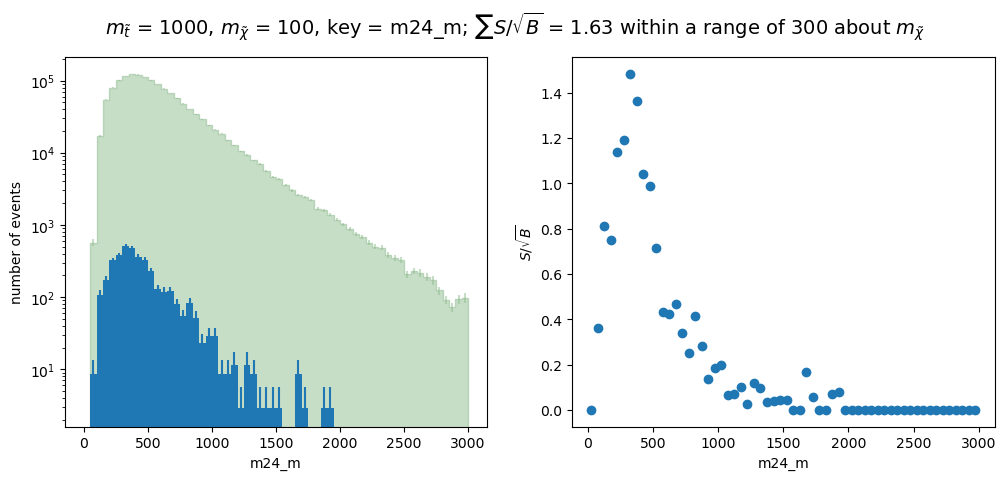

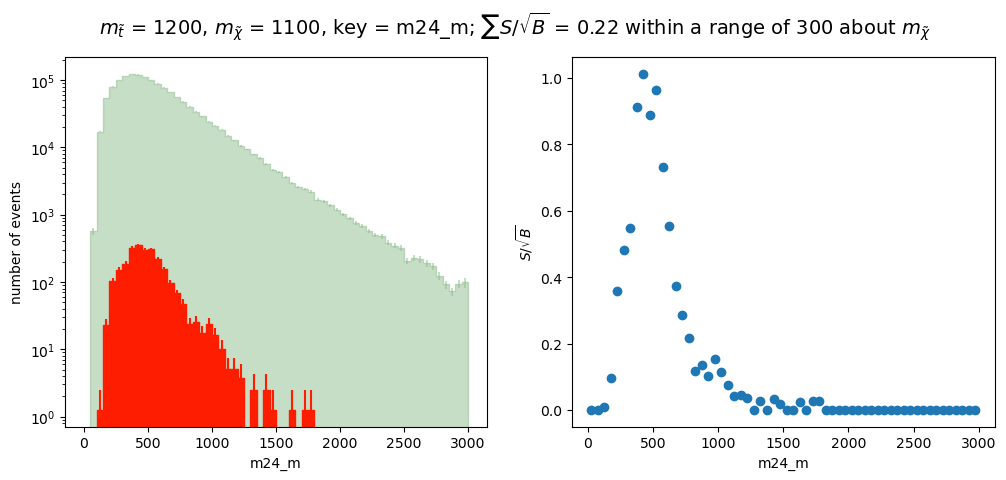

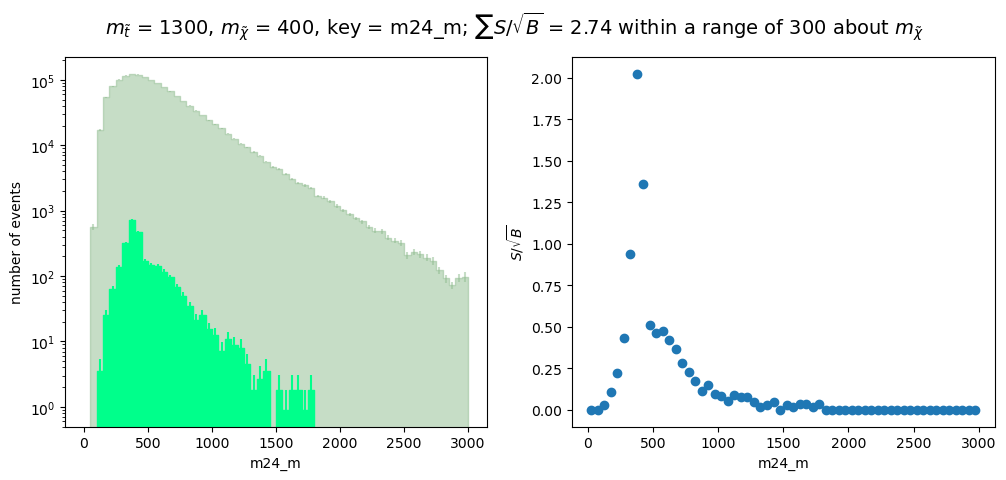

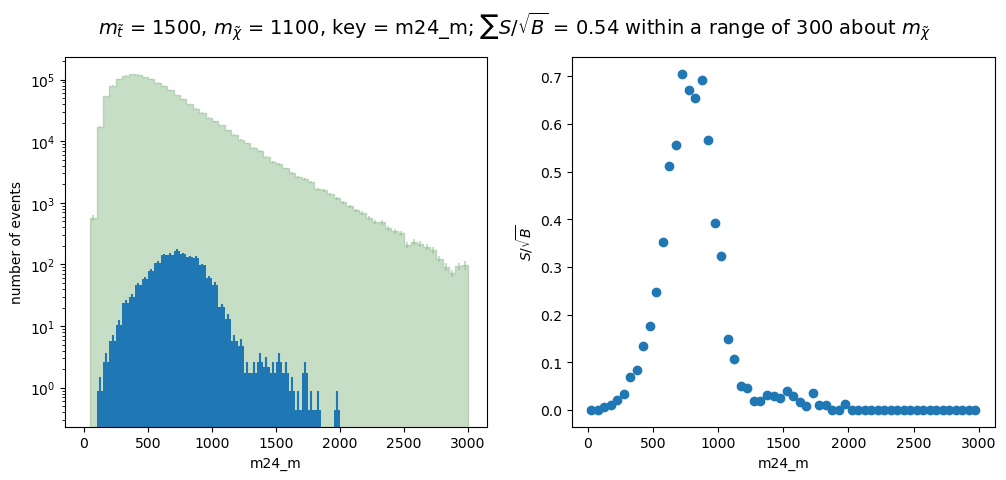

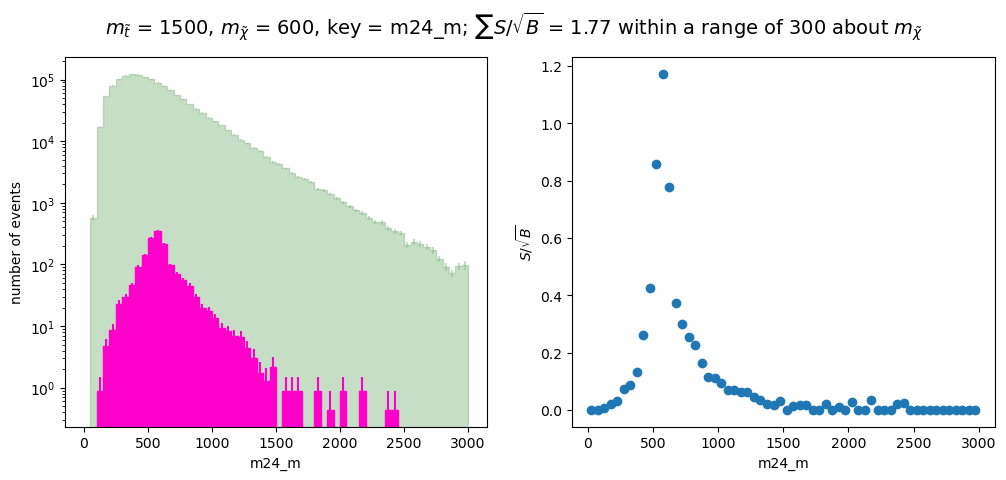

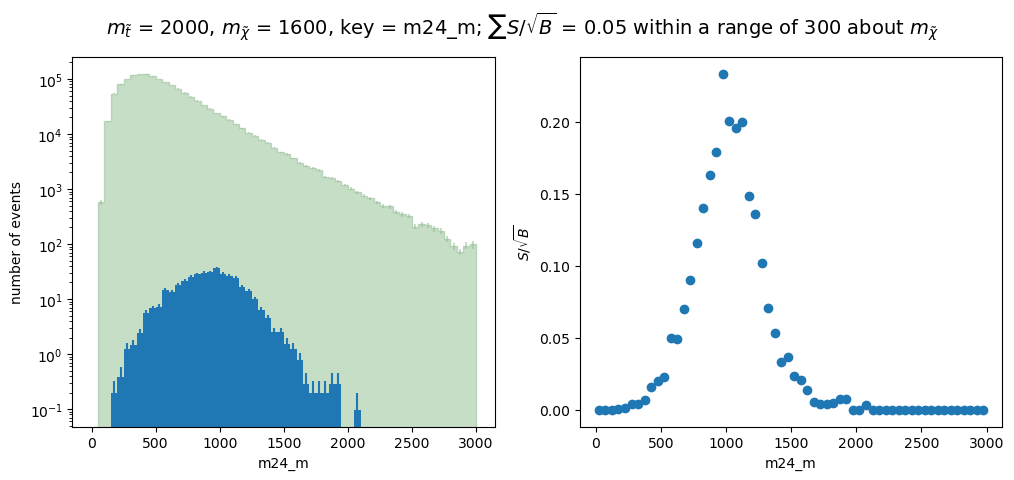

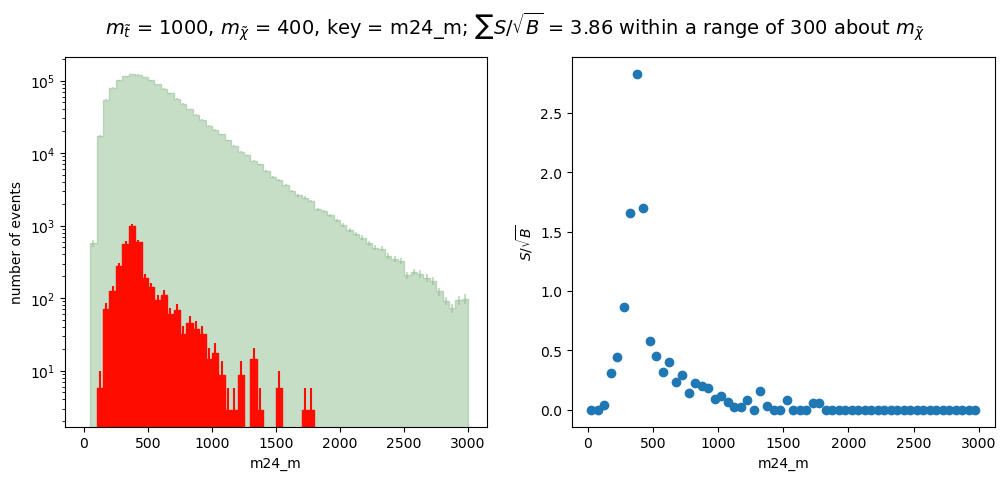

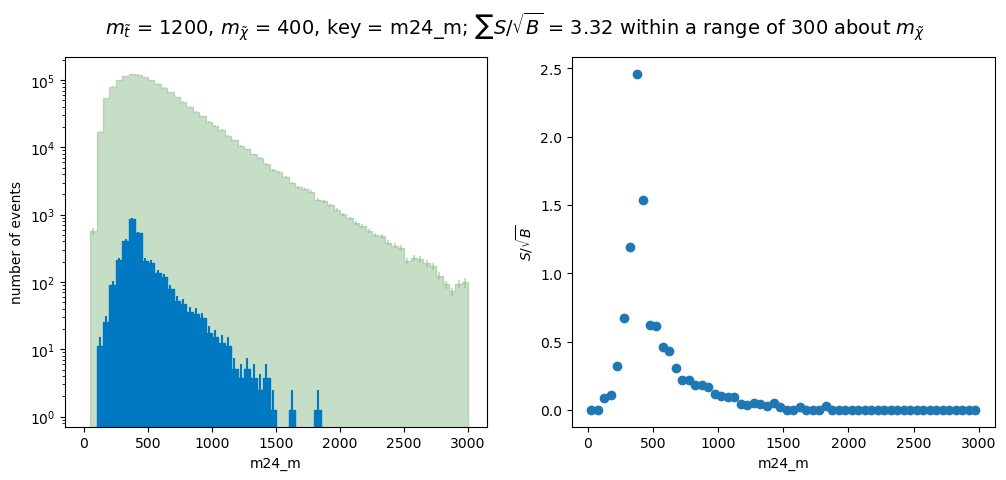

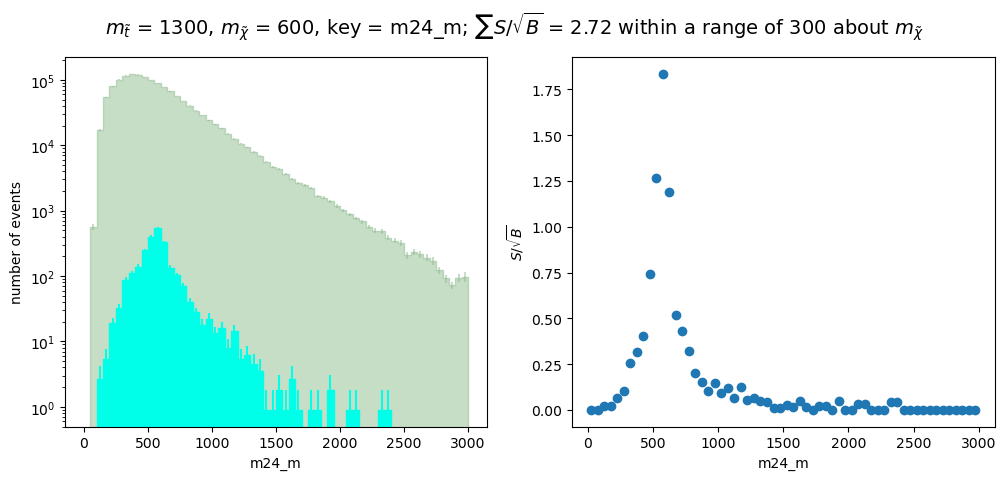

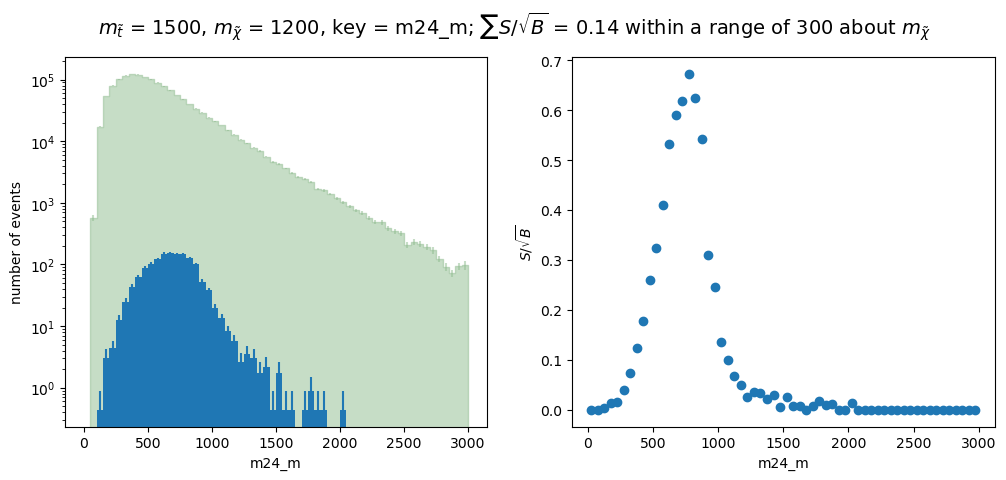

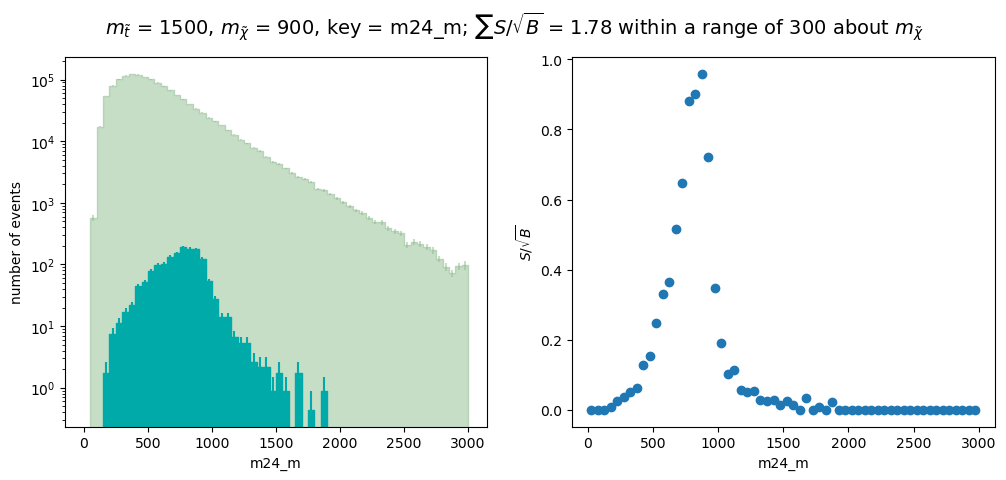

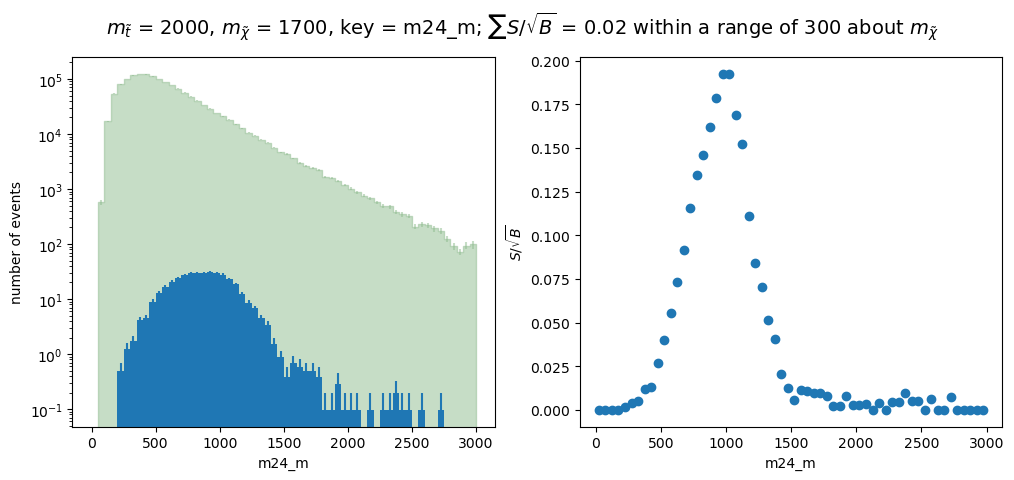

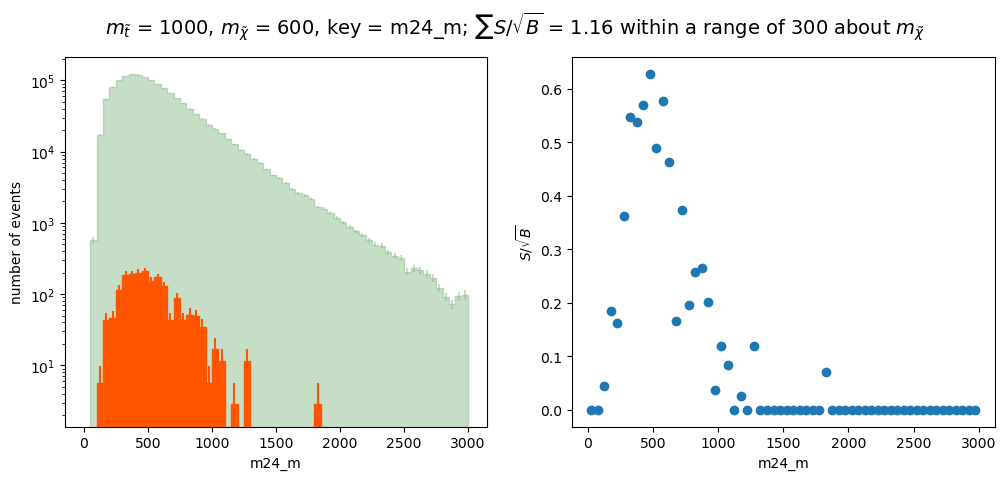

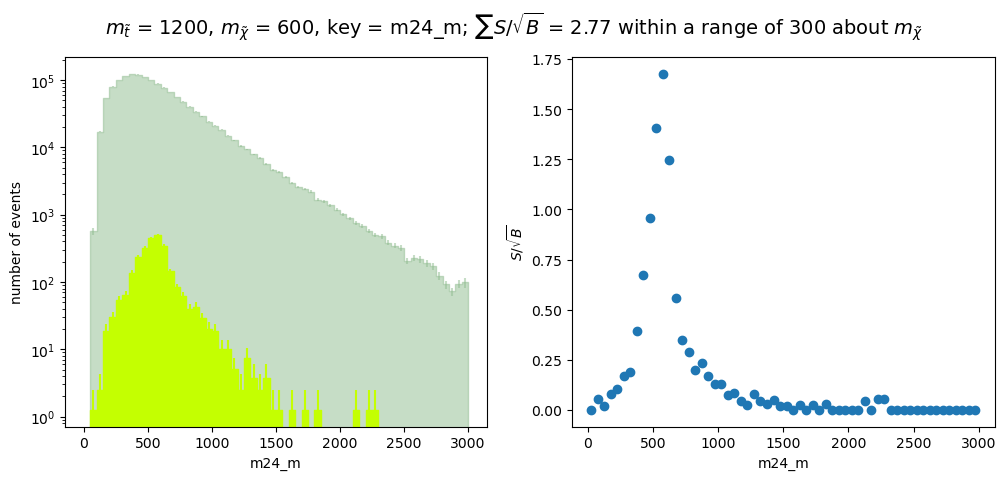

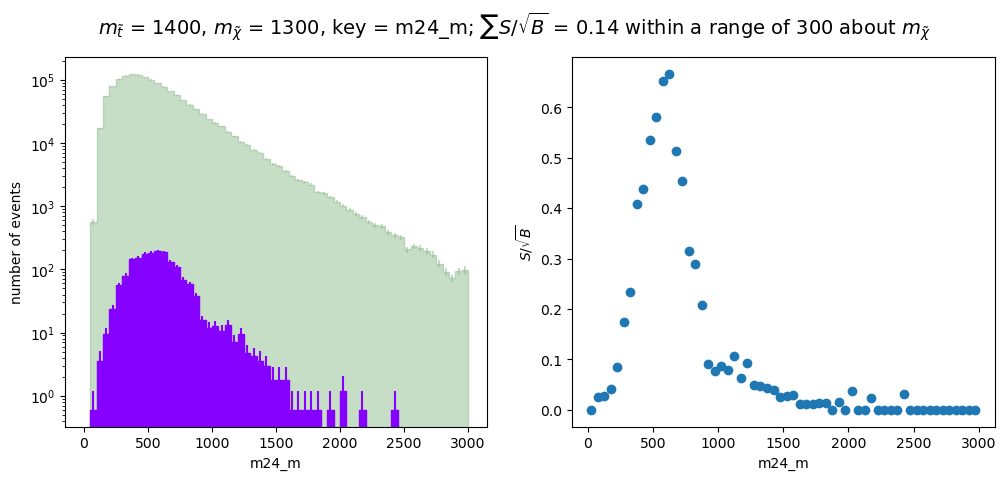

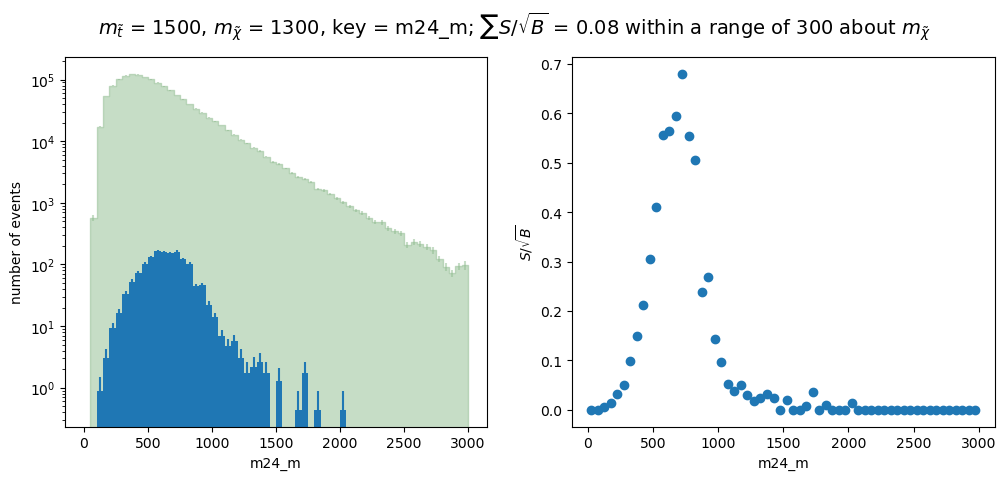

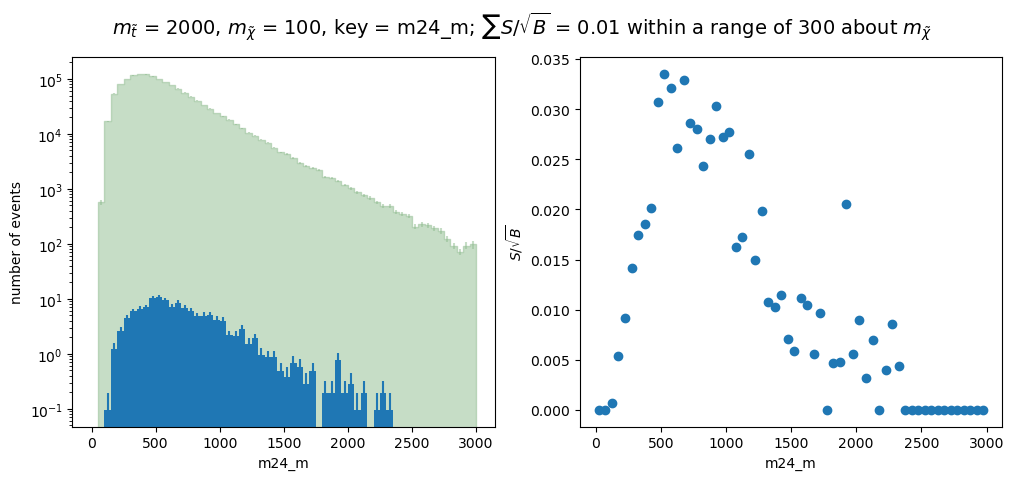

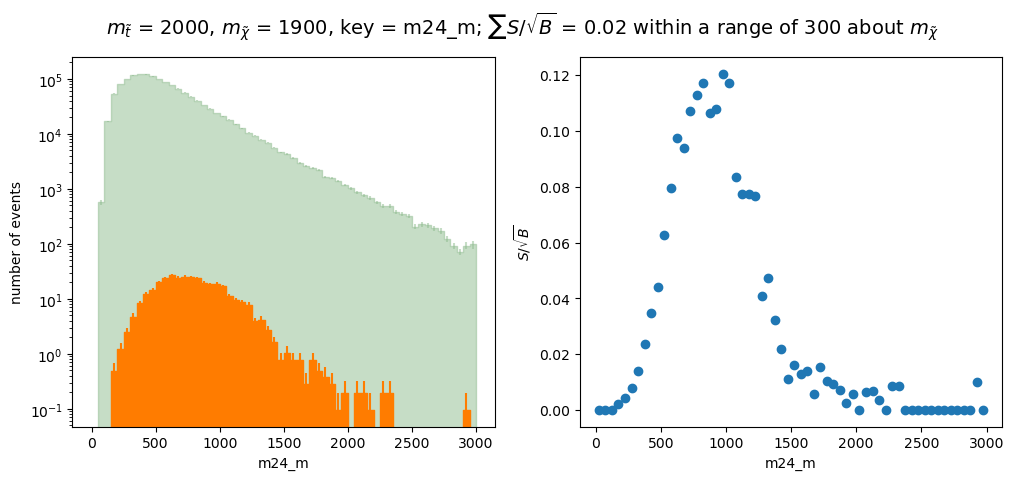

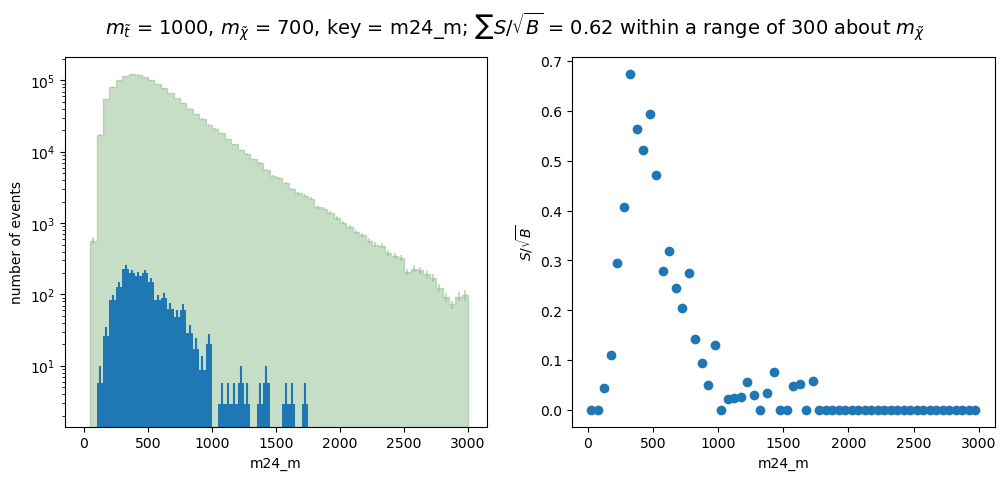

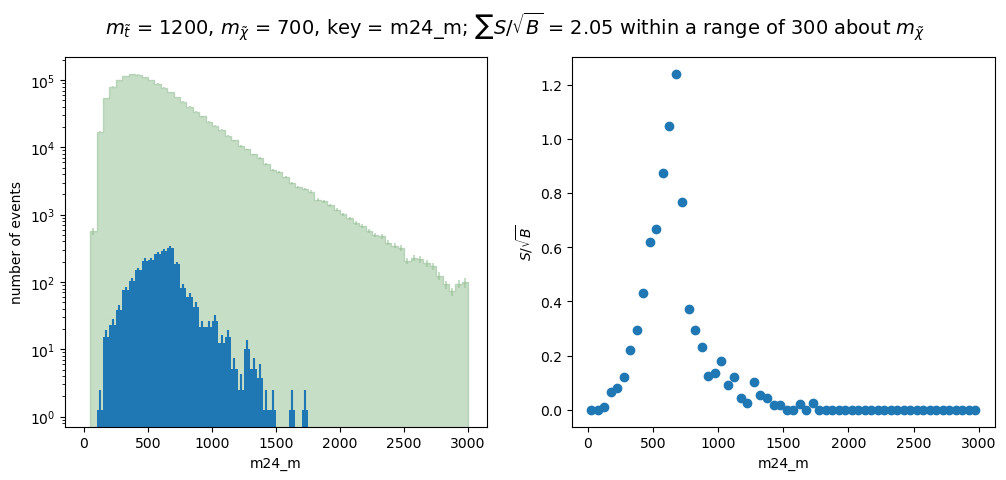

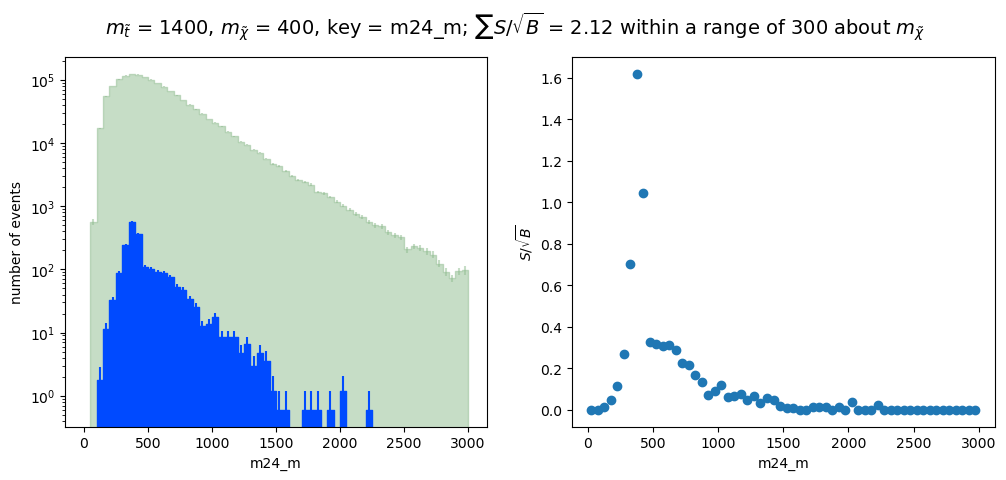

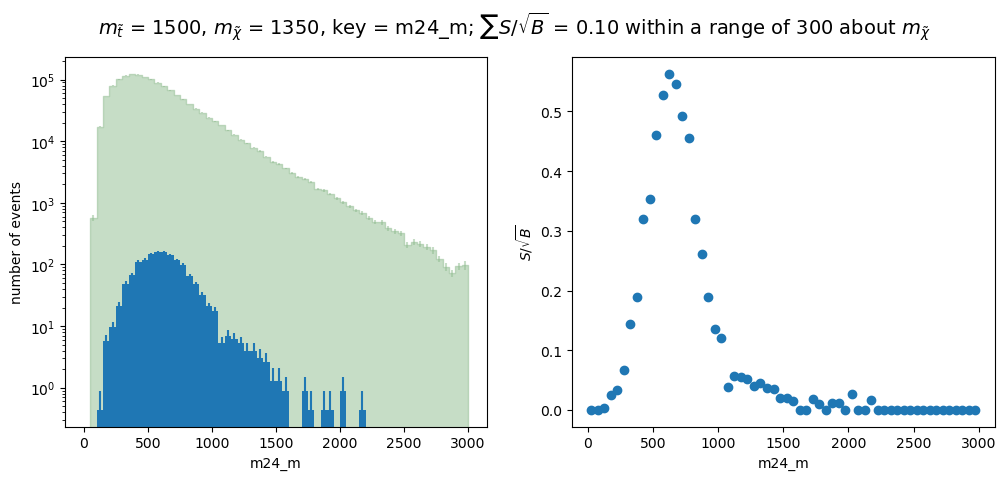

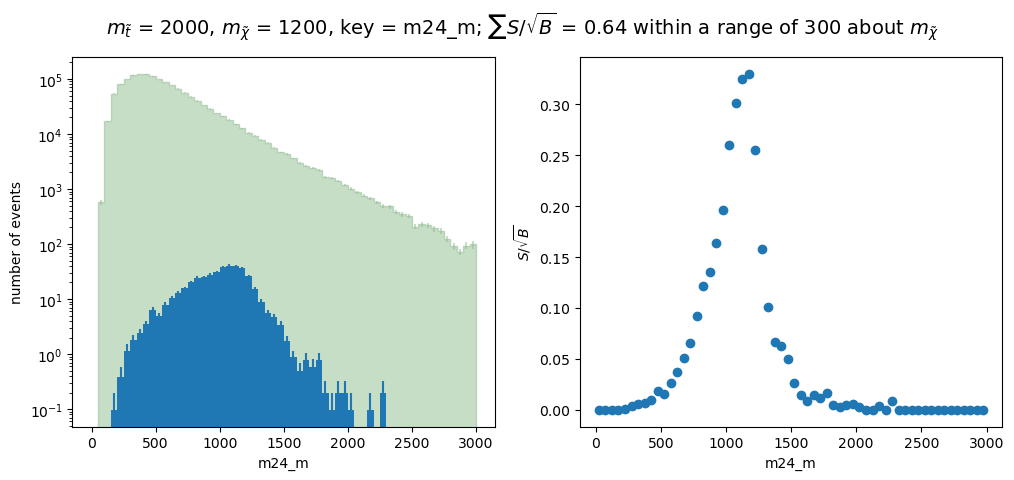

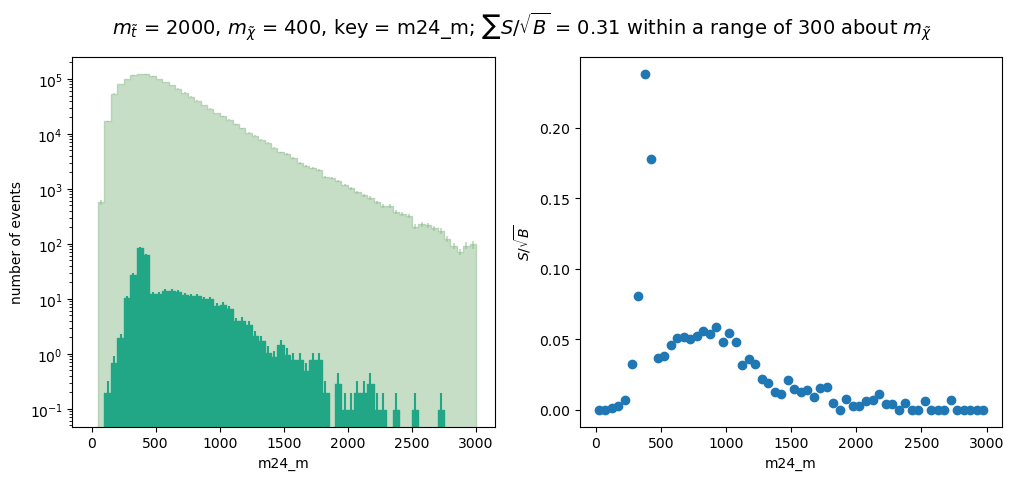

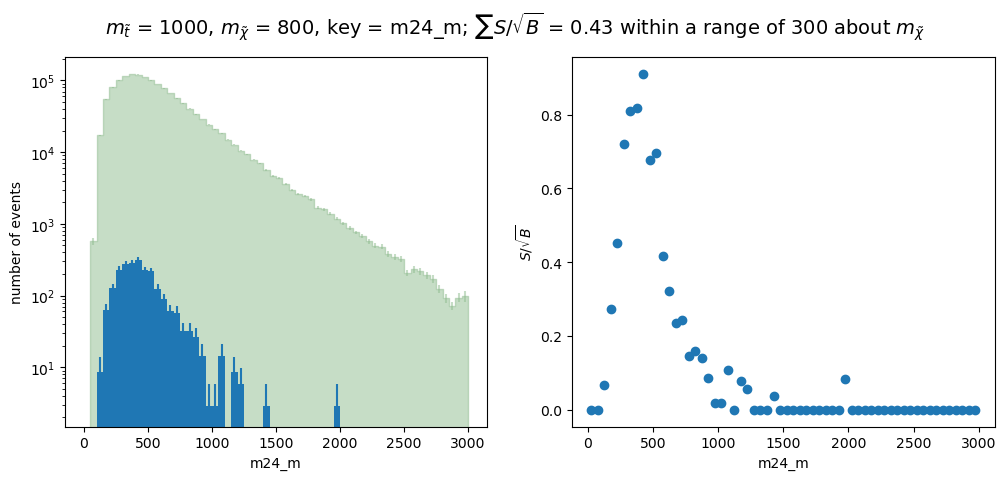

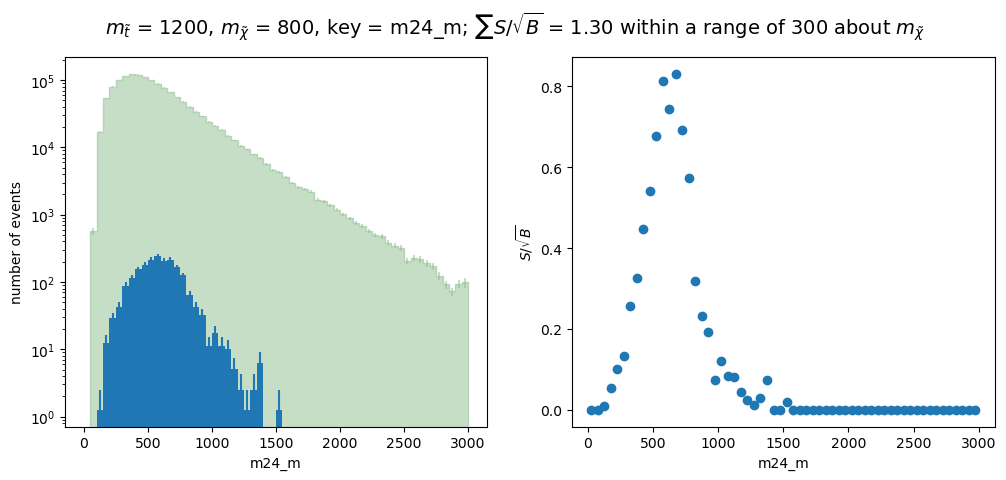

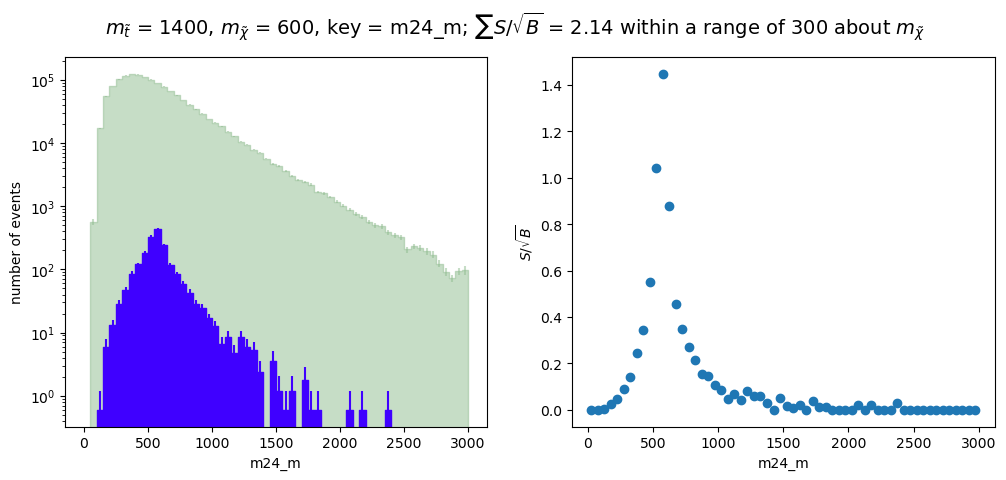

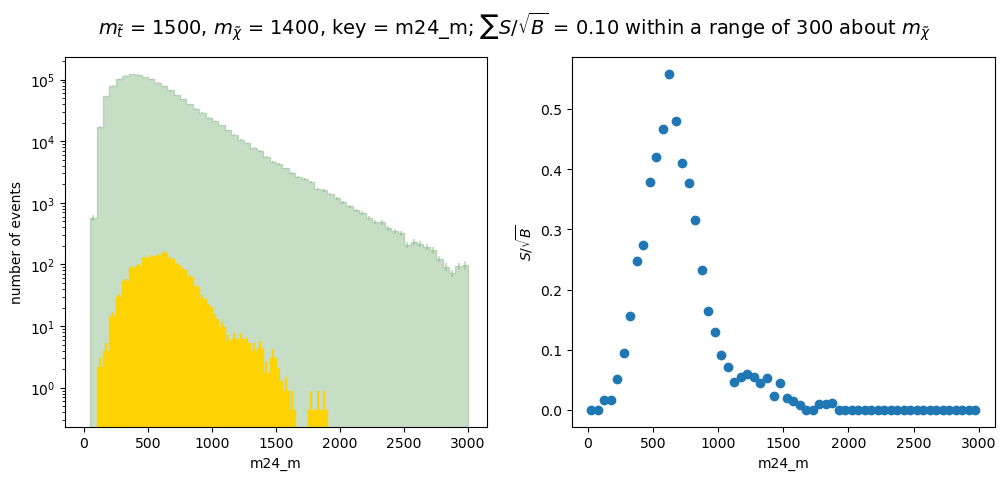

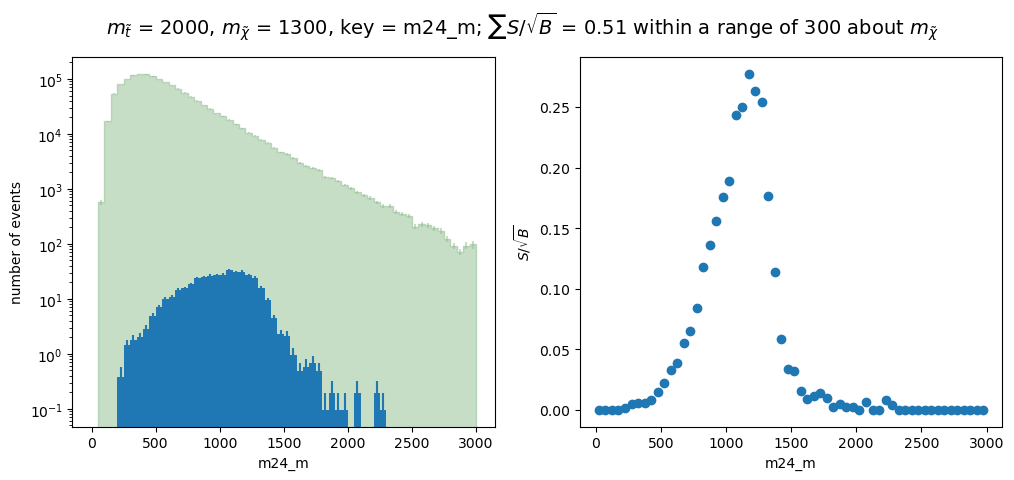

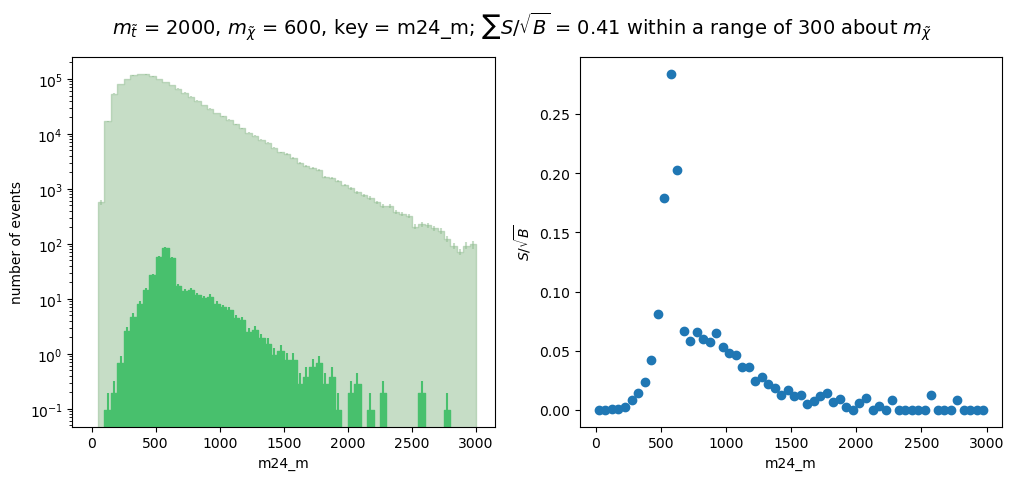

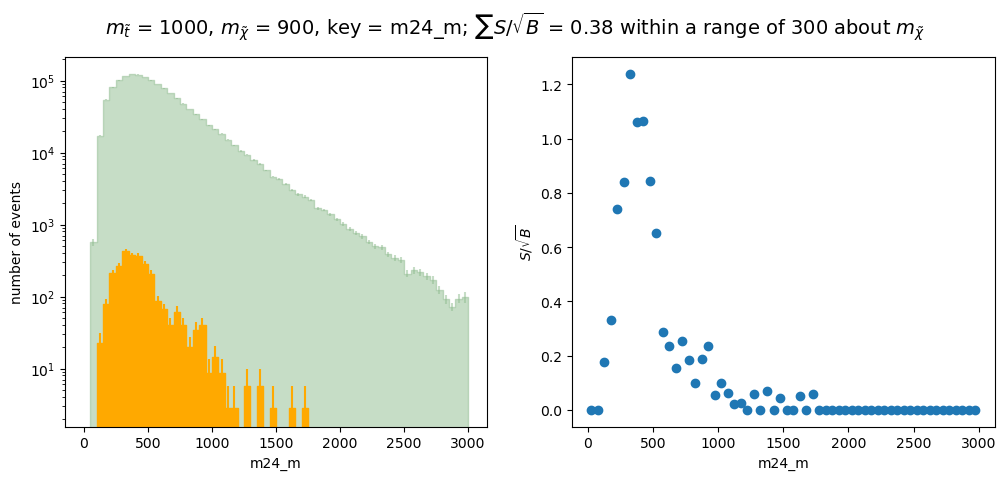

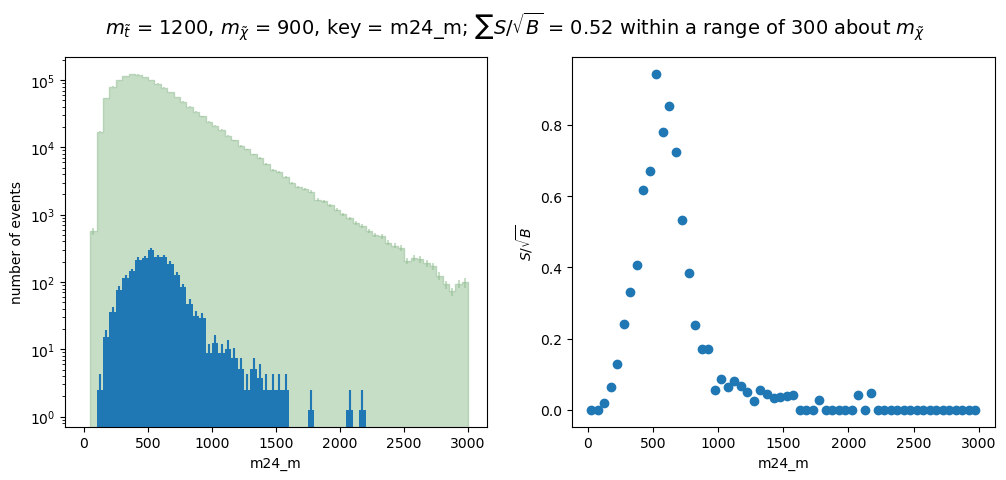

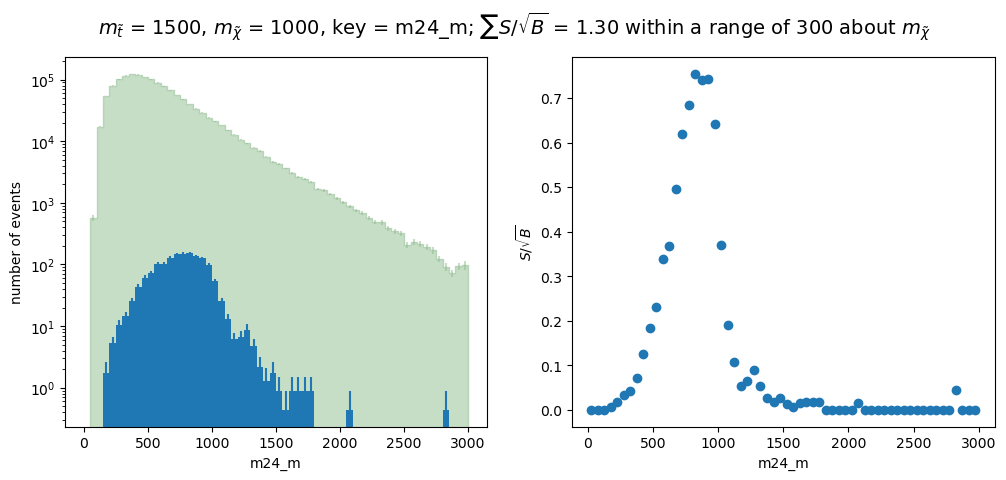

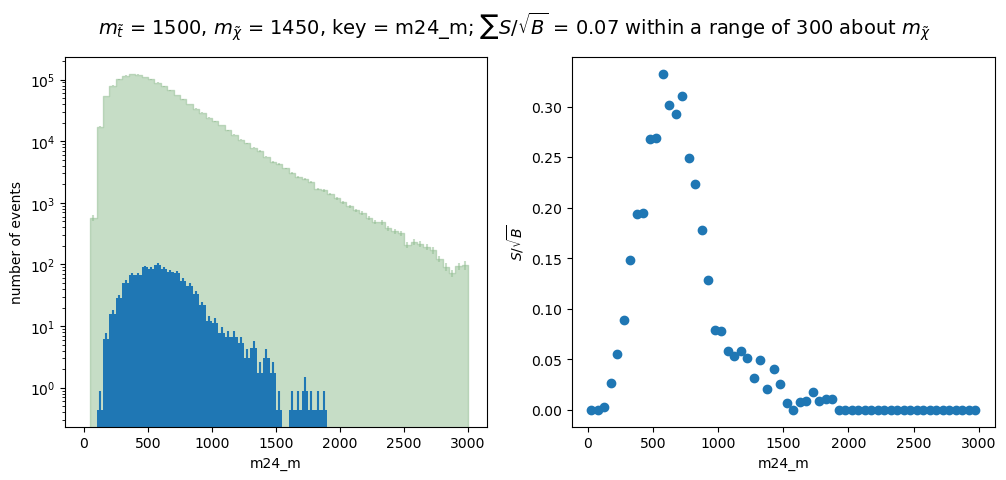

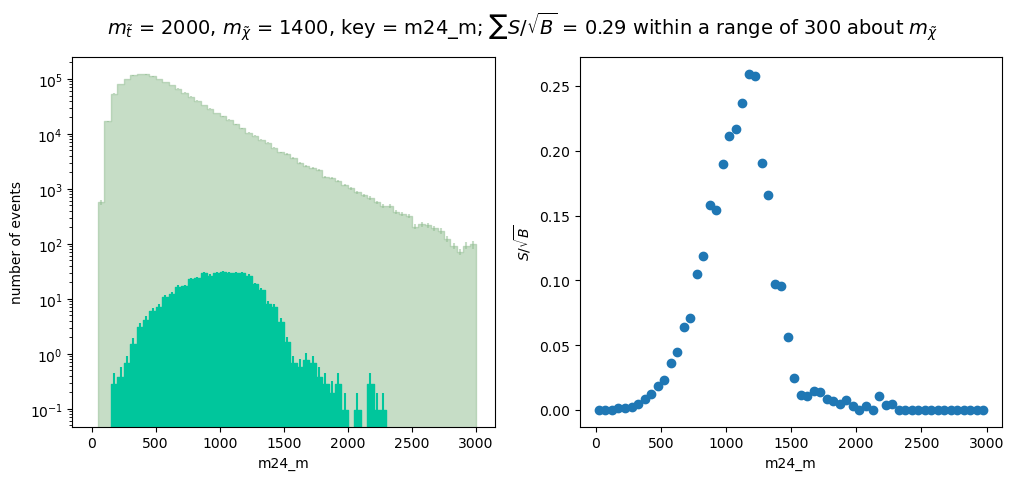

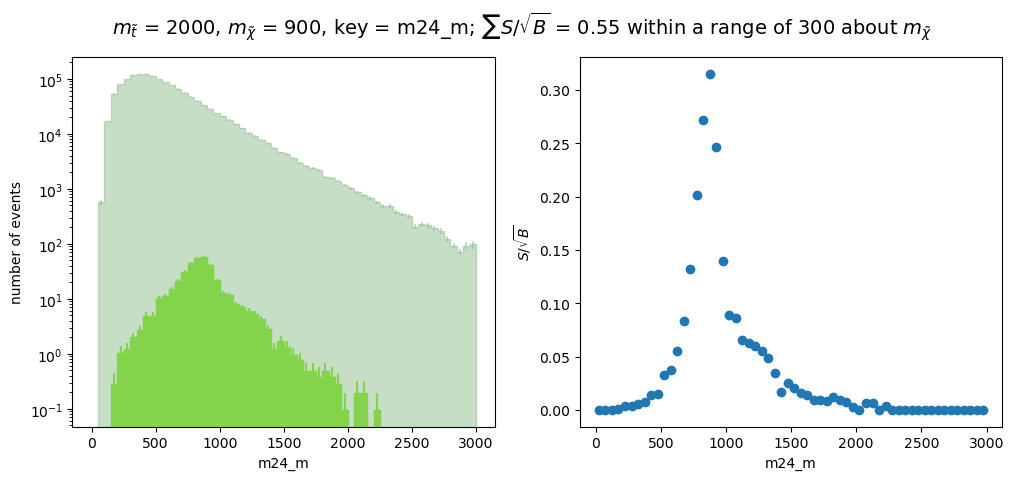

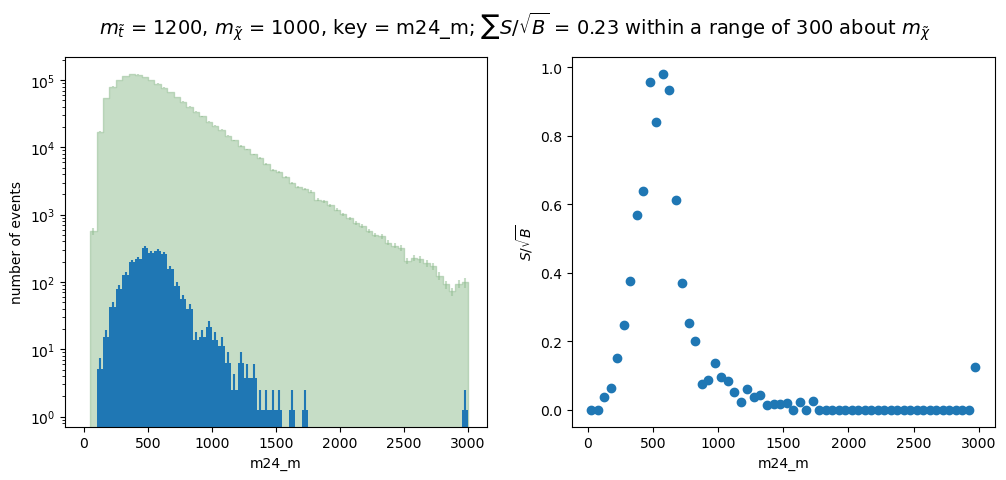

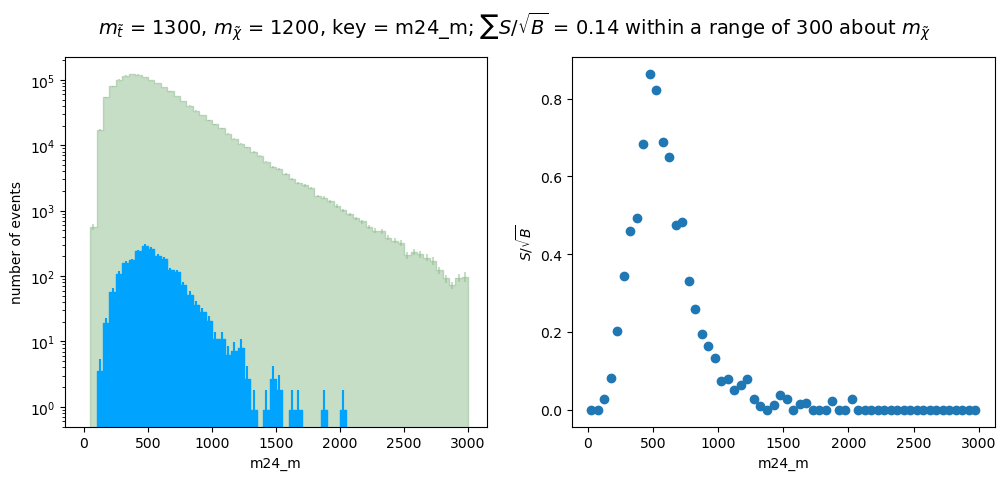

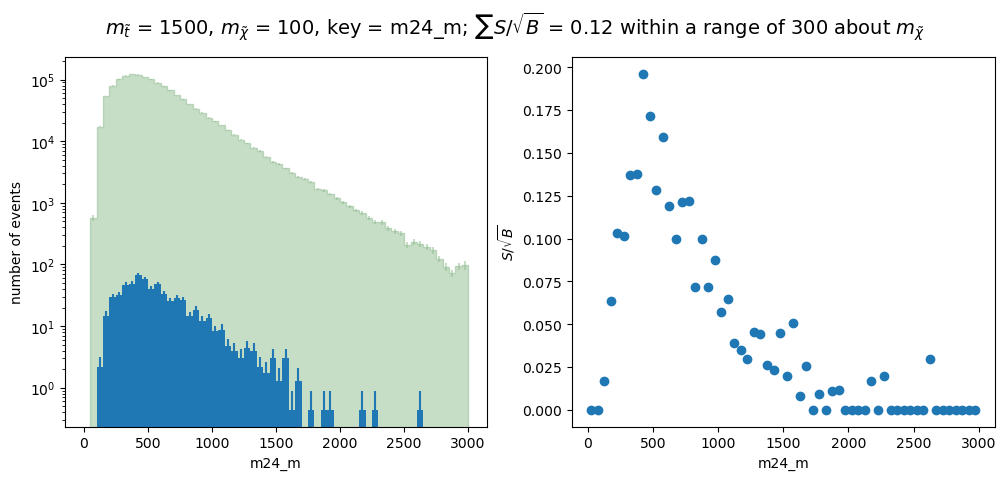

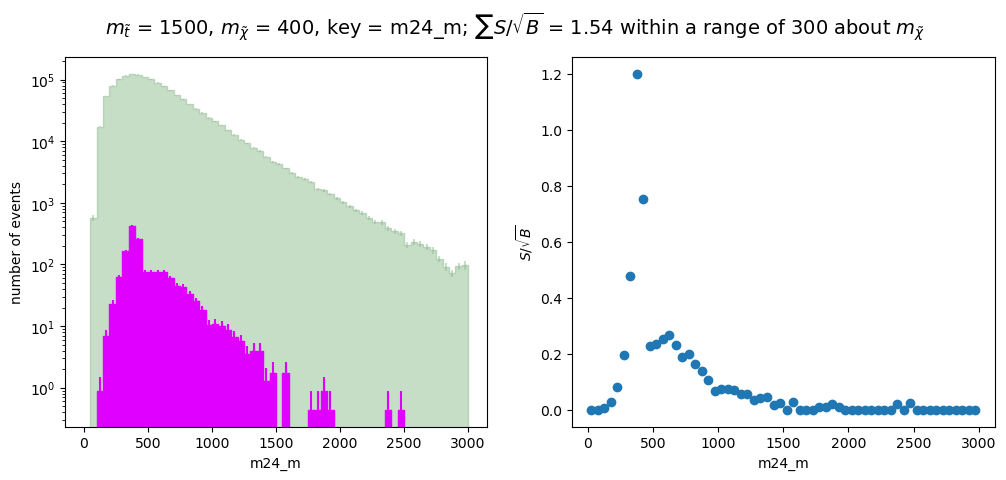

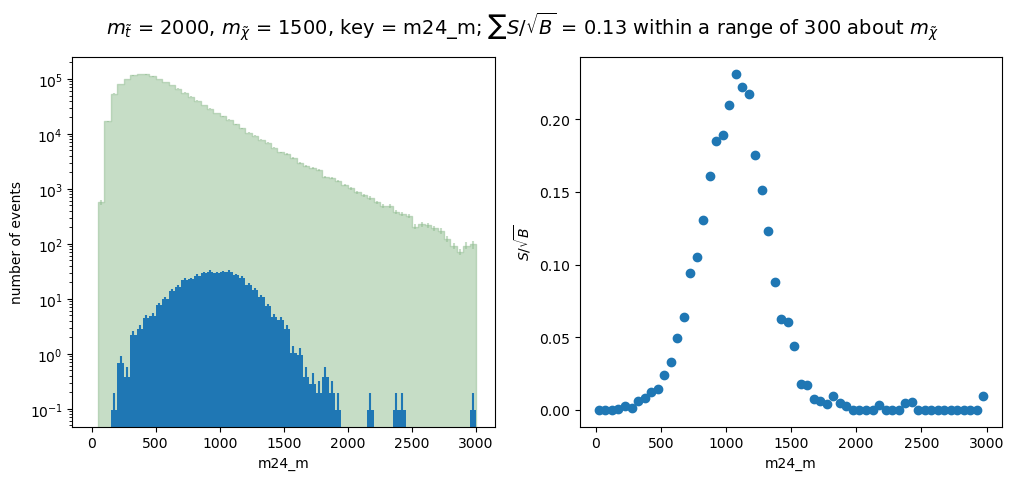

In [13]:
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi, sum_range_width)

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style)
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\sum S/\sqrt{{B}}$ = {s_over_root_b:.2f} within a range of {sum_range_width} about $m_\\tilde{{\chi}}$", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    ax[1].scatter(bin_centers, points)
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")
